# Home_Credit_Default_Risk_Preprocessing

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

import os

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

データ読み込み

In [2]:
print(os.listdir("D:\data\Jupyter Notebook\kaggle\Home-Credit-Default-Risk"))

['.git', '.gitignore', '.ipynb_checkpoints', 'A Gentale introduction.ipynb', 'application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'Home_Credit_Default_Risk_Preprocessing_Learning.ipynb', 'installments_payments.csv', 'LightGBM_baseline.csv', 'LightGBM_baseline_2.csv', 'LightGBM_baseline_3.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'README.md', 'sample_submission.csv', 'train.csv']


In [3]:
os.chdir("D:\data\Jupyter Notebook\kaggle\Home-Credit-Default-Risk")
app_train =pd.read_csv("application_train.csv")
print('Training data shape:',app_train.shape)
app_train.head()

Training data shape: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
app_test = pd.read_csv("application_test.csv")
print('Testing data shape:',app_test.shape)
app_test_copy = app_test
app_test.head()

Testing data shape: (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### EDAはA Gentle introductionをみてね

### 欠損値の調査

In [5]:
#列の欠損値を調べる関数
def missing_values_table(df):
    #欠損値合計
    mis_val = df.isnull().sum()
    #欠損値割合
    mis_val_percent = 100 * df.isnull().sum()/len(df)
    #結果のテーブルを作成
    mis_val_table = pd.concat([mis_val,mis_val_percent],axis=1)
    
    #列名をリネーム
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0:'Missing Values',1:'% of Total Values'})
    
    #降順にソート
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1]!=0].sort_values(
    '% of Total Values',ascending=False).round(1)
    
    #サマリーを表示
    print("Your selected dataframe has "+str(df.shape[1])+" columns.\n"
         "There are "+str(mis_val_table_ren_columns.shape[0])+
         " columns that have missing values.")
    
    #欠損情報のデータフレームを返す
    return mis_val_table_ren_columns

In [6]:
#欠損統計
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [7]:
#オブジェクトタイプ列の値の種類(カテゴリカル変数の特定)
app_train.select_dtypes('object').apply(pd.Series.nunique,axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

カテゴリカル変数のエンコーディング

In [8]:
le = LabelEncoder()
le_count = 0

for col in app_train:
    if app_train[col].dtype == 'object':
        if len(list(app_train[col].unique())) <= 2:
            le.fit(app_train[col])
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [9]:
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


トレーニングデータとテストデータの整列

In [10]:
#TARGET列は残したいので退避
train_labels = app_train['TARGET']
#トレーニング、テストデータどちらにもある列のみ残す
app_train,app_test = app_train.align(app_test,join='inner',axis = 1)
#退避したTARGET列を戻す
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


In [11]:
(app_train['DAYS_BIRTH']/-365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [12]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

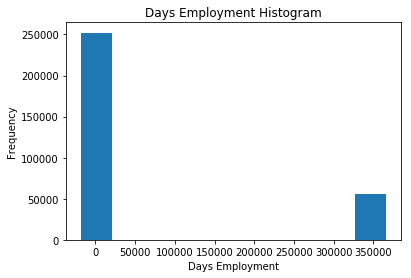

In [13]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [14]:
anom = app_train[app_train['DAYS_EMPLOYED']==365243]
non_anom = app_train[app_train['DAYS_EMPLOYED']!=365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


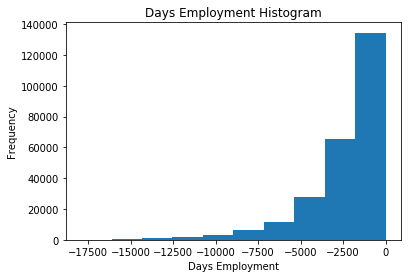

In [15]:
#365243という特徴的な値を示すboolean型の列を作る
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] ==365243
#365243になっているところを欠損に置き換え
app_train['DAYS_EMPLOYED'].replace({365243:np.nan},inplace = True)
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [16]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


In [17]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982712

### polynominal features adding

In [18]:
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.fit_transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures

poly_transformer = PolynomialFeatures(degree = 3)

In [19]:
poly_transformer.fit(poly_features)

poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape:',poly_features.shape)

Polynomial Features shape: (307511, 35)


In [20]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

In [21]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

poly_features['TARGET'] = poly_target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


In [22]:
poly_features_test = pd.DataFrame(poly_features_test,
                                  columns = poly_transformer.get_feature_names
                                  (['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                    'EXT_SOURCE_3', 'DAYS_BIRTH']))

#マージ
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR',how = 'left')
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

#揃える
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis =1)

print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Test data with polynomial features shape: ',app_test_poly.shape)

Training data with polynomial features shape:  (307511, 275)
Test data with polynomial features shape:  (48744, 275)


### domain features adding

In [73]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

### domain poly adding

In [79]:
app_train_domain_poly = app_train.copy()
app_test_domain_poly = app_test.copy()

app_train_domain_poly['CREDIT_INCOME_PERCENT'] = app_train_domain_poly['AMT_CREDIT'] / app_train_domain_poly['AMT_INCOME_TOTAL']
app_train_domain_poly['ANNUITY_INCOME_PERCENT'] = app_train_domain_poly['AMT_ANNUITY'] / app_train_domain_poly['AMT_INCOME_TOTAL']
app_train_domain_poly['CREDIT_TERM'] = app_train_domain_poly['AMT_ANNUITY'] / app_train_domain_poly['AMT_CREDIT']
app_train_domain_poly['DAYS_EMPLOYED_PERCENT'] = app_train_domain_poly['DAYS_EMPLOYED'] / app_train_domain_poly['DAYS_BIRTH']

app_test_domain_poly['CREDIT_INCOME_PERCENT'] = app_test_domain_poly['AMT_CREDIT'] / app_test_domain_poly['AMT_INCOME_TOTAL']
app_test_domain_poly['ANNUITY_INCOME_PERCENT'] = app_test_domain_poly['AMT_ANNUITY'] / app_test_domain_poly['AMT_INCOME_TOTAL']
app_test_domain_poly['CREDIT_TERM'] = app_test_domain_poly['AMT_ANNUITY'] / app_test_domain_poly['AMT_CREDIT']
app_test_domain_poly['DAYS_EMPLOYED_PERCENT'] = app_test_domain_poly['DAYS_EMPLOYED'] / app_test_domain_poly['DAYS_BIRTH']

#マージ
app_train_domain_poly = app_train_domain_poly.merge(poly_features, on = 'SK_ID_CURR',how = 'left')
app_test_domain_poly = app_test_domain_poly.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')
app_train_domain_poly.shape
#揃える
app_train_domain_poly, app_test_domain_poly = app_train_domain_poly.align(app_test_domain_poly, join = 'inner', axis =1)
print('Training data with polynomial features shape: ', app_train_domain_poly.shape)
print('Test data with polynomial features shape: ',app_test_domain_poly.shape)

Training data with polynomial features shape:  (307511, 279)
Test data with polynomial features shape:  (48744, 279)


## app_trainの欠損値埋め・標準化

In [24]:
from sklearn.preprocessing import MinMaxScaler, Imputer
# 欠損値を穴埋めし値を標準化する関数
#パラメータ
 # df_train:トレーニングデータ
 # df_test:テストデータ

def Impscaler(df_train,df_test):
    from sklearn.preprocessing import MinMaxScaler, Imputer
    # Drop the target from the training data
    if 'TARGET' in df_train:
        train = df_train.drop(columns = ['TARGET'])
    else:
        train = df_train.copy()
    # Feature names
    features = list(train.columns)
    # Copy of the testing data
    test = df_test.copy()
    # Median imputation of missing values
    imputer = Imputer(strategy = 'median')
    imputer.fit(train)
    train = imputer.transform(train)
    test = imputer.transform(df_test)
    
    # Scale each feature to 0-1
    scaler = MinMaxScaler(feature_range = (0, 1))
    scaler.fit(train)
    train = scaler.transform(train)
    test = scaler.transform(test)

    print('Training data shape: ', train.shape)
    print('Testing data shape: ', test.shape)
    return train,test

In [25]:
# 通常のデータを欠損値埋め・標準化
train,test = Impscaler(app_train,app_test)

Training data shape:  (307511, 240)
Testing data shape:  (48744, 240)


In [26]:
# 多項式データを欠損値埋め・標準化
train_poly,test_poly = Impscaler(app_train_poly,app_test_poly)

Training data shape:  (307511, 275)
Testing data shape:  (48744, 275)


In [27]:
# 多項式データを欠損値埋め・標準化
train_domain,test_domain = Impscaler(app_train_domain,app_test_domain)

Training data shape:  (307511, 244)
Testing data shape:  (48744, 244)


In [28]:
#feature_importanceをプロットするための関数
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

## LightGBM

### 通常

In [29]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

In [54]:
def model(features, test_features, encoding = 'ohe', n_folds = 5):
    
    """Train and test a light gradient boosting model using
    cross validation. 
    
    Parameters
    --------
        features (pd.DataFrame): 
            dataframe of training features to use 
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame): 
            dataframe of testing features to use
            for making predictions with the model. 
        encoding (str, default = 'ohe'): 
            method for encoding categorical variables. Either 'ohe' for one-hot encoding or 'le' for integer label encoding
            n_folds (int, default = 5): number of folds to use for cross validation
        
    Return
    --------
        submission (pd.DataFrame): 
            dataframe with `SK_ID_CURR` and `TARGET` probabilities
            predicted by the model.
        feature_importances (pd.DataFrame): 
            dataframe with the feature importances from the model.
        valid_metrics (pd.DataFrame): 
            dataframe with training and validation metrics (ROC AUC) for each fold and overall.
        
    """
    
    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])
    
    
    # One Hot Encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # Align the dataframes by the columns
        features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        # No categorical indices to record
        cat_indices = 'auto'
    
    # Integer label encoding
    elif encoding == 'le':
        
        # Create a label encoder
        label_encoder = LabelEncoder()
        
        # List for storing categorical indices
        cat_indices = []
        
        # Iterate through each column
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # Map the categorical features to integers
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                # Record the categorical indices
                cat_indices.append(i)
    
    # Catch error if label encoding scheme is not valid
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics

In [58]:
submission, fi, metrics = model(app_train,app_test)
print('Baseline metrics')
print(metrics)

Training Data Shape:  (307511, 239)
Testing Data Shape:  (48744, 239)
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.754949	train's auc: 0.79887
Early stopping, best iteration is:
[208]	valid's auc: 0.755109	train's auc: 0.80025
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.758539	train's auc: 0.798518
Early stopping, best iteration is:
[217]	valid's auc: 0.758619	train's auc: 0.801374
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.762652	train's auc: 0.79774
[400]	valid's auc: 0.762202	train's auc: 0.827288
Early stopping, best iteration is:
[320]	valid's auc: 0.763103	train's auc: 0.81638
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.757496	train's auc: 0.799107
Early stopping, best iteration is:
[183]	valid's auc: 0.75759	train's auc: 0.796125
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.758099	tr

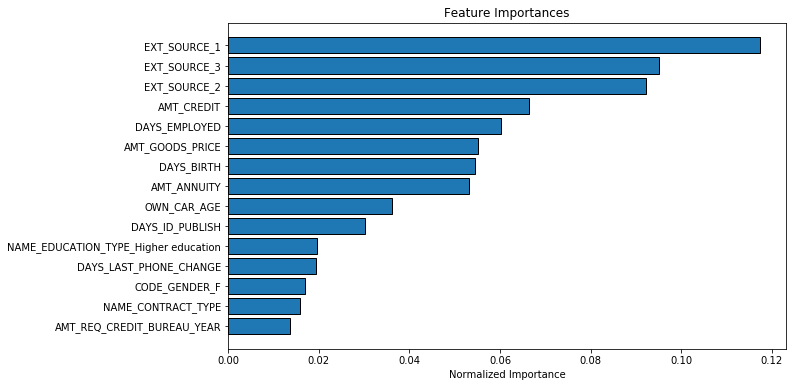

In [50]:
fi_sorted = plot_feature_importances(fi)

In [51]:
submission.to_csv('baseline_lgb.csv', index = False)

### domain

In [55]:
app_train_domain['TARGET'] = train_labels

# Test the domain knolwedge features
submission_domain, fi_domain, metrics_domain = model(app_train_domain, app_test_domain)
print('Baseline with domain knowledge features metrics')
print(metrics_domain)

Training Data Shape:  (307511, 243)
Testing Data Shape:  (48744, 243)
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.762577	train's auc: 0.804531
Early stopping, best iteration is:
[237]	valid's auc: 0.762858	train's auc: 0.810671
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.765594	train's auc: 0.804304
Early stopping, best iteration is:
[227]	valid's auc: 0.765861	train's auc: 0.808665
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.770139	train's auc: 0.803753
[400]	valid's auc: 0.770328	train's auc: 0.834338
Early stopping, best iteration is:
[302]	valid's auc: 0.770629	train's auc: 0.820401
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.765653	train's auc: 0.804487
Early stopping, best iteration is:
[262]	valid's auc: 0.766318	train's auc: 0.815066
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.7644

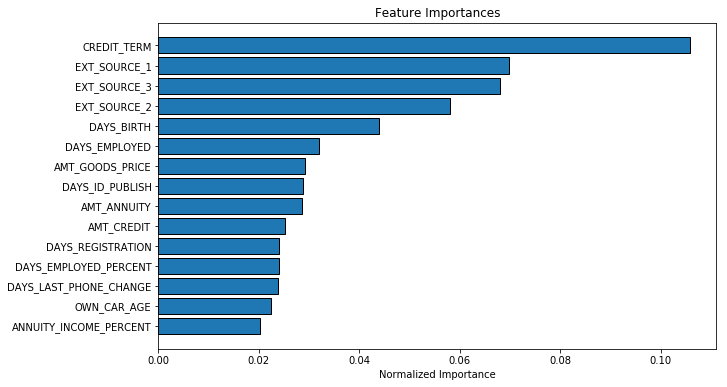

In [56]:
fi_sorted = plot_feature_importances(fi_domain)

In [83]:
submission_domain.to_csv('baseline_lgb_domain_features.csv', index = False)

In [115]:
#テストデータで予測
predictions = gbm.predict_proba(test)[:,1]

In [116]:
# Make a submission dataframe
submit = app_test_copy[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('LightGBM_baseline_3.csv', index = False)

### domain_poly

In [80]:
app_train_domain_poly['TARGET'] = train_labels

# Test the domain knolwedge features
submission_domain_poly, fi_domain_poly, metrics_domain_poly = model(app_train_domain_poly, app_test_domain_poly)
print('Baseline with domain knowledge features metrics')
print(metrics_domain_poly)

Training Data Shape:  (307511, 278)
Testing Data Shape:  (48744, 278)
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.761475	train's auc: 0.805882
[400]	valid's auc: 0.761558	train's auc: 0.837375
Early stopping, best iteration is:
[307]	valid's auc: 0.762089	train's auc: 0.824036
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.765865	train's auc: 0.80602
[400]	valid's auc: 0.765725	train's auc: 0.837595
Early stopping, best iteration is:
[359]	valid's auc: 0.766223	train's auc: 0.831913
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.770516	train's auc: 0.804884
Early stopping, best iteration is:
[232]	valid's auc: 0.770788	train's auc: 0.810721
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.766787	train's auc: 0.805994
Early stopping, best iteration is:
[225]	valid's auc: 0.766843	train's auc: 0.810418
Training until validation scores don't 

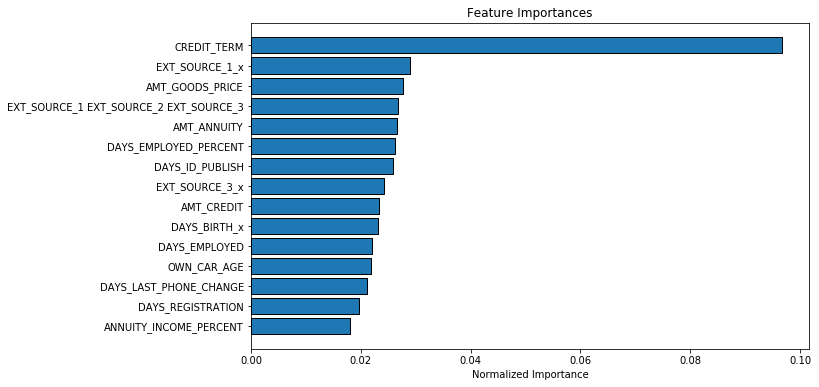

In [81]:
fi_sorted = plot_feature_importances(fi_domain_poly)

In [82]:
submission_domain_poly.to_csv('baseline_lgb_domain_poly.csv', index = False)

### ランダムフォレスト(通常データ)

In [59]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 100,
                                       random_state = 50,
                                       verbose = 1, n_jobs = -1)
random_forest.fit(train,train_labels)
# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.4min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.4s finished


In [60]:
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions
submit.to_csv('random_forest_baseline.csv',index = False)

### ランダムフォレスト(poly_features)

In [61]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 100,
                                       random_state = 50,
                                       verbose = 1, n_jobs = -1)
random_forest.fit(train_poly,train_labels)
# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test_poly)[:, 1]

In [63]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline_engineered.csv', index = False)

### ランダムフォレスト(domain features)

In [65]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 100,
                                       random_state = 50,
                                       verbose = 1, n_jobs = -1)
random_forest.fit(train_domain,train_labels)
# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test_domain)[:, 1]

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.9min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.7s finished


In [66]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline_domain.csv', index = False)

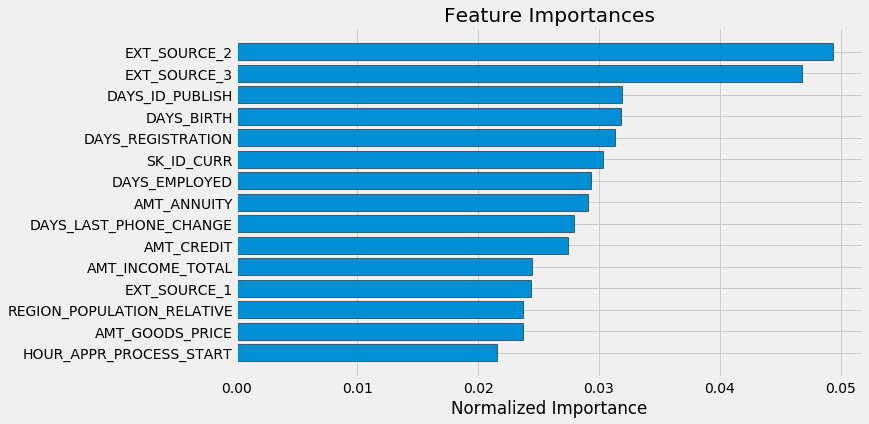

In [68]:
# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importances)